In [1]:
import pandas as pd #To import data
import numpy as np

# For map
import folium 
from folium.plugins import HeatMap, HeatMapWithTime

# For plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors # Creating color bar
import seaborn as sns # Historgram

# For bokeh plots
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
from bokeh.models import ColumnDataSource, Legend, LegendItem
from bokeh.io import output_file


### Import data

In [2]:
# Specify the full path to the CSV file
file_path = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\Benches.csv"

# Read data from the specified file
df = pd.read_csv(file_path)

# Counts rows and columns
print(f"Total number of rows: {df.shape[0]}")
print(f"Total number of columns: {df.shape[1]}")

# Preview the first 5 lines of the loaded data
df.head()

Total number of rows: 212122
Total number of columns: 13


,time,Sensor Location,dev_id,Sensor Name,azimuthDeg,Lat Long,batV,inTrip,inclinationDeg,manDown,temp,type,xyz
0,2022-12-20T08:08:03+01:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",2.994,0.0,NaN,NaN,26.0,status,NaN
1,2022-12-20T08:23:11+01:00,Seat Asset ID: 1119051,guppy-2340,Bench Sensor 3,NaN,"-37.8028278, 144.9654266",2.980,0.0,NaN,NaN,26.0,status,NaN
2,2022-12-20T08:43:27+01:00,Seat Asset ID: 1119882,guppy-2332,Bench Sensor 2,NaN,"-37.8027388, 144.9655868",2.994,0.0,NaN,NaN,24.0,status,NaN
3,2022-12-21T00:21:40+01:00,Seat Asset ID: 1119051,guppy-2340,Bench Sensor 3,NaN,"-37.8028278, 144.9654266",2.980,1.0,NaN,NaN,29.0,status,NaN
4,2022-12-21T00:24:51+01:00,Seat Asset ID: 1119051,guppy-2340,Bench Sensor 3,NaN,"-37.8028278, 144.9654266",2.980,0.0,NaN,NaN,29.0,status,NaN


### Seperate time column into two columns -and the same with the Lat Long column

In [3]:
df['time'] = pd.to_datetime(df['time'], utc=True)
df['time'] = df['time'].dt.tz_convert('Australia/Melbourne')

df['date'] = df['time'].dt.date

df['clock'] = df['time'].dt.time

df[['Latitude', 'Longitude']] = df['Lat Long'].str.split(',', expand=True).astype(float) #splits to float


print(f"Total number of rows: {df.shape[0]}")
print(f"Total number of columns: {df.shape[1]}")

df.head()

Total number of rows: 212122
Total number of columns: 17


,time,Sensor Location,dev_id,Sensor Name,azimuthDeg,Lat Long,batV,inTrip,inclinationDeg,manDown,temp,type,xyz,date,clock,Latitude,Longitude
0,2022-12-20 18:08:03+11:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",2.994,0.0,NaN,NaN,26.0,status,NaN,2022-12-20,18:08:03,-37.802739,144.965587
1,2022-12-20 18:23:11+11:00,Seat Asset ID: 1119051,guppy-2340,Bench Sensor 3,NaN,"-37.8028278, 144.9654266",2.980,0.0,NaN,NaN,26.0,status,NaN,2022-12-20,18:23:11,-37.802828,144.965427
2,2022-12-20 18:43:27+11:00,Seat Asset ID: 1119882,guppy-2332,Bench Sensor 2,NaN,"-37.8027388, 144.9655868",2.994,0.0,NaN,NaN,24.0,status,NaN,2022-12-20,18:43:27,-37.802739,144.965587
3,2022-12-21 10:21:40+11:00,Seat Asset ID: 1119051,guppy-2340,Bench Sensor 3,NaN,"-37.8028278, 144.9654266",2.980,1.0,NaN,NaN,29.0,status,NaN,2022-12-21,10:21:40,-37.802828,144.965427
4,2022-12-21 10:24:51+11:00,Seat Asset ID: 1119051,guppy-2340,Bench Sensor 3,NaN,"-37.8028278, 144.9654266",2.980,0.0,NaN,NaN,29.0,status,NaN,2022-12-21,10:24:51,-37.802828,144.965427


In [4]:
# Finds the first and last date in the dataset
start_dato = df['date'].min()
slut_dato = df['date'].max()
print("The dataset is from", start_dato, "till", slut_dato)

# Compare with number of possible days in the period
antal_mulige_dage = (slut_dato - start_dato).days + 1
print("Number of days:", antal_mulige_dage)

The dataset is from 2020-06-04 till 2025-07-18
Number of days: 1871


### Maps

In [5]:
unique_coordinates = df['Lat Long'].dropna().unique()
num_unique_coordinates = len(unique_coordinates)
unique_coordinates, num_unique_coordinates

(array(['-37.8027388, 144.9655868', '-37.8028278, 144.9654266'],
       dtype=object),
 2)

In [6]:
# Number of unique sensor names
antal_unikke_sensorer = df['Sensor Name'].nunique()
print("Number of unique sensor names:", antal_unikke_sensorer)

Number of unique sensor names: 4


In [7]:
# Start map where the coordinates are for Melbourne (the coordiantes are found from google)
map_center = [-37.815, 144.97]
m = folium.Map(location=map_center, zoom_start=14)

# Add marker
for coord in unique_coordinates:
    lat, lon = map(float, coord.split(','))
    folium.Marker(location=[lat, lon], popup=coord).add_to(m)

# Show map (in Jupyter Notebook)
m

### Separate the different sensors

In [8]:
df_sensor_1 = df[df["Sensor Name"] == "Bench Sensor 1"]
df_sensor_2 = df[df["Sensor Name"] == "Bench Sensor 2"]
df_sensor_3 = df[df["Sensor Name"] == "Bench Sensor 3"]
df_sensor_4 = df[df["Sensor Name"] == "Bench Sensor 4"]

df_sensor_1.head()

,time,Sensor Location,dev_id,Sensor Name,azimuthDeg,Lat Long,batV,inTrip,inclinationDeg,manDown,temp,type,xyz,date,clock,Latitude,Longitude
0,2022-12-20 18:08:03+11:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",2.994,0.0,NaN,NaN,26.0,status,NaN,2022-12-20,18:08:03,-37.802739,144.965587
5,2022-12-21 12:52:48+11:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",2.994,0.0,NaN,NaN,25.0,status,NaN,2022-12-21,12:52:48,-37.802739,144.965587
6,2025-01-09 08:32:29+11:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",2.742,1.0,NaN,NaN,22.0,status,NaN,2025-01-09,08:32:29,-37.802739,144.965587
8,2022-12-16 18:57:20+11:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",2.994,0.0,NaN,NaN,17.0,status,NaN,2022-12-16,18:57:20,-37.802739,144.965587
23,2022-12-19 18:41:22+11:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",2.994,0.0,NaN,NaN,24.0,status,NaN,2022-12-19,18:41:22,-37.802739,144.965587


In [9]:
print(f"Total number of rows: {df_sensor_1.shape[0]}")
print(f"Total number of columns: {df_sensor_1.shape[1]}")

Total number of rows: 50310
Total number of columns: 17


In [10]:
df_s1_sorted_date = df_sensor_1.sort_values(by="time")
df_s2_sorted_date = df_sensor_2.sort_values(by="time")
df_s3_sorted_date = df_sensor_3.sort_values(by="time")
df_s4_sorted_date = df_sensor_4.sort_values(by="time")

df_s1_sorted_date.head()

,time,Sensor Location,dev_id,Sensor Name,azimuthDeg,Lat Long,batV,inTrip,inclinationDeg,manDown,temp,type,xyz,date,clock,Latitude,Longitude
132351,2020-06-05 09:19:06+10:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",3.106,1.0,NaN,NaN,6.0,status,NaN,2020-06-05,09:19:06,-37.802739,144.965587
130815,2020-06-05 09:22:15+10:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",3.106,0.0,NaN,NaN,6.0,status,NaN,2020-06-05,09:22:15,-37.802739,144.965587
27681,2020-06-05 10:11:11+10:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",3.106,1.0,NaN,NaN,8.0,status,NaN,2020-06-05,10:11:11,-37.802739,144.965587
70939,2020-06-05 10:14:20+10:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",3.106,0.0,NaN,NaN,8.0,status,NaN,2020-06-05,10:14:20,-37.802739,144.965587
24247,2020-06-05 12:46:34+10:00,Seat Asset ID: 1119882,guppy-2308,Bench Sensor 1,NaN,"-37.8027388, 144.9655868",3.106,1.0,NaN,NaN,14.0,status,NaN,2020-06-05,12:46:34,-37.802739,144.965587


In [11]:
dwell_times = []
in_trip_active = False
start_time = None
temp_values = []

# Loop through all rows in the sorted DataFrame
for idx, row in df_s1_sorted_date.iterrows():
    current_in_trip = row['inTrip']
    current_time = row['time']
    current_temp = row['temp']

    if not in_trip_active and current_in_trip == 1.0:
        # Start inTrip period
        in_trip_active = True
        start_time = current_time
        temp_values = [current_temp]

    elif in_trip_active:
        # Accumulate temperatures during the inTrip period
        temp_values.append(current_temp)

        if current_in_trip == 0.0:
            # End inTrip period
            dwell = (current_time - start_time).total_seconds() / 60 
            avg_temp = np.nanmean(temp_values)

            # Save results
            dwell_times.append({
                "dwell": dwell,
                "temp": avg_temp,
                "date": start_time.date(),
                "time": start_time.time()
            })

            # Reset for the next period
            in_trip_active = False
            start_time = None
            temp_values = []

# Create DataFrame with the results
df_s1 = pd.DataFrame(dwell_times)

df_s1.head()


,dwell,temp,date,time
0,3.150000,6.0,2020-06-05,09:19:06
1,3.150000,8.0,2020-06-05,10:11:11
2,7.216667,14.0,2020-06-05,12:46:34
3,3.116667,14.5,2020-06-05,13:04:14
4,2.966667,15.0,2020-06-05,13:24:58


In [12]:
print(f"Total number of rows: {df_s1.shape[0]}")
print(f"Total number of columns: {df_s1.shape[1]}")

Total number of rows: 23853
Total number of columns: 4


In [13]:
dwell_times = []
in_trip_active = False
start_time = None
temp_values = []

# Loop through all rows in the sorted DataFrame
for idx, row in df_s2_sorted_date.iterrows():
    current_in_trip = row['inTrip']
    current_time = row['time']
    current_temp = row['temp']

    if not in_trip_active and current_in_trip == 1.0:
        # Start inTrip period
        in_trip_active = True
        start_time = current_time
        temp_values = [current_temp]

    elif in_trip_active:
        # Accumulate temperatures during the inTrip period
        temp_values.append(current_temp)

        if current_in_trip == 0.0:
            # End inTrip period
            dwell = (current_time - start_time).total_seconds() / 60
            avg_temp = np.nanmean(temp_values)

            # Save results
            dwell_times.append({
                "dwell": dwell,
                "temp": avg_temp,
                "date": start_time.date(),
                "time": start_time.time()
            })

            # Reset for the next period
            in_trip_active = False
            start_time = None
            temp_values = []

# Create DataFrame with the results
df_s2 = pd.DataFrame(dwell_times)

df_s2.head()

,dwell,temp,date,time
0,2.200000,6.0,2020-06-05,09:15:08
1,4.133333,6.0,2020-06-05,09:18:24
2,3.166667,8.0,2020-06-05,10:11:14
3,2.950000,13.0,2020-06-05,12:43:55
4,3.000000,13.0,2020-06-05,12:50:07


In [14]:
dwell_times = []
in_trip_active = False
start_time = None
temp_values = []

# Loop through all rows in the sorted DataFrame
for idx, row in df_s3_sorted_date.iterrows():
    current_in_trip = row['inTrip']
    current_time = row['time']
    current_temp = row['temp']

    if not in_trip_active and current_in_trip == 1.0:
        # Start inTrip period
        in_trip_active = True
        start_time = current_time
        temp_values = [current_temp]

    elif in_trip_active:
        # Accumulate temperatures during the inTrip period
        temp_values.append(current_temp)

        if current_in_trip == 0.0:
            # End inTrip period
            dwell = (current_time - start_time).total_seconds() / 60
            avg_temp = np.nanmean(temp_values)

            # Save results
            dwell_times.append({
                "dwell": dwell,
                "temp": avg_temp,
                "date": start_time.date(),
                "time": start_time.time()
            })

            # Reset for the next period
            in_trip_active = False
            start_time = None
            temp_values = []

# Create DataFrame with the results
df_s3 = pd.DataFrame(dwell_times)

df_s3.head()

,dwell,temp,date,time
0,2.250000,21.0,2020-06-04,13:09:08
1,3.016667,21.5,2020-06-04,13:28:29
2,7.150000,20.0,2020-06-04,13:48:30
3,10.233333,19.0,2020-06-04,13:56:19
4,2.966667,17.0,2020-06-04,14:19:03


In [15]:
dwell_times = []
in_trip_active = False
start_time = None
temp_values = []

# Loop through all rows in the sorted DataFrame
for idx, row in df_s4_sorted_date.iterrows():
    current_in_trip = row['inTrip']
    current_time = row['time']
    current_temp = row['temp']

    if not in_trip_active and current_in_trip == 1.0:
        # Start inTrip period
        in_trip_active = True
        start_time = current_time
        temp_values = [current_temp]

    elif in_trip_active:
        # Accumulate temperatures during the inTrip period
        temp_values.append(current_temp)

        if current_in_trip == 0.0:
            # Slut end inTrip period
            dwell = (current_time - start_time).total_seconds() / 60
            avg_temp = np.nanmean(temp_values)

            # Save results
            dwell_times.append({
                "dwell": dwell,
                "temp": avg_temp,
                "date": start_time.date(),
                "time": start_time.time()
            })

            # Reset for the next period
            in_trip_active = False
            start_time = None
            temp_values = []

# Create DataFrame with the results
df_s4 = pd.DataFrame(dwell_times)

df_s4.head()

,dwell,temp,date,time
0,2.383333,22.0,2020-06-04,13:09:01
1,3.033333,22.0,2020-06-04,13:25:28
2,2.550000,22.0,2020-06-04,13:29:06
3,3.100000,20.0,2020-06-04,13:50:16
4,4.100000,17.5,2020-06-04,14:01:58


### Time plots

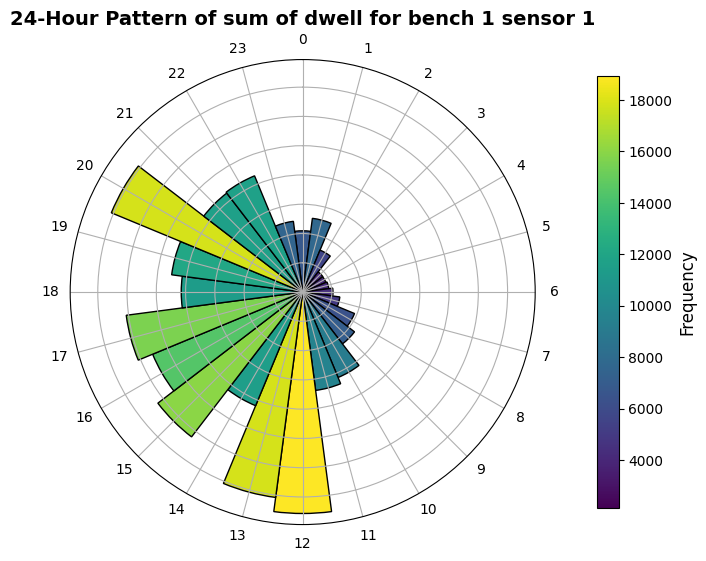

In [16]:
df_s1["hour"] = df_s1["time"].apply(lambda t: t.hour)

hours = df_s1.groupby('hour')['dwell'].sum()
#hours = df_s1.groupby('hour')['dwell'].mean()

angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=False)
widths = np.pi / 12 
colors = plt.cm.viridis(hours.values / hours.values.max())

# Plot settings
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, hours.values, width=widths, color=colors, edgecolor='black')

# Make the chart look like a clock
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis',norm=mcolors.Normalize(vmin=hours.values.min(), vmax=hours.values.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Frequency',fontsize=12)

# Set labels and title
ax.set_xticks(angles)
ax.set_xticklabels(hours.index, fontsize=10)
ax.set_yticklabels([])
ax.set_title('24-Hour Pattern of sum of dwell for bench 1 sensor 1', fontsize=14, fontweight='bold')

# Show plot
plt.show()

### Bokeh -time of day and dwell

In [17]:
df_s1["hour"] = df_s1["time"].apply(lambda t: t.hour)
df_s2["hour"] = df_s2["time"].apply(lambda t: t.hour)
df_s3["hour"] = df_s3["time"].apply(lambda t: t.hour)
df_s4["hour"] = df_s4["time"].apply(lambda t: t.hour)

def prepare_sensor_data(df, label):
    grouped = df.groupby("hour")["dwell"].sum()
    return grouped.sort_index().rename(label)

data = pd.concat([
    prepare_sensor_data(df_s1, "s1"),
    prepare_sensor_data(df_s2, "s2"),
    prepare_sensor_data(df_s3, "s3"),
    prepare_sensor_data(df_s4, "s4")
], axis=1).fillna(0)

# Bokeh source setup
source_data = {"hour": list(range(24))}
for sensor in data.columns:
    source_data[sensor] = data[sensor].values
source = ColumnDataSource(data=source_data)

# Make figure
p = figure(
    title="Dwell Time per Hour – All Sensors",
    x_axis_label="Time of Day",
    y_axis_label="Sum of Dwell Time",
    x_range=(0, 23),
    width=900,
    height=400,
    toolbar_location=None
)

colors = Category10[4]
sensor_labels = ["s1", "s2", "s3", "s4"]
sensor_groups = ["Bench 1", "Bench 1", "Bench 2", "Bench 2"]
legend_items = []

# Draw lines and save legend items
for i, sensor in enumerate(sensor_labels):
    line = p.line(x='hour', y=sensor, source=source,
                  line_width=2, color=colors[i],
                  muted_alpha=0.1, muted=True)
    circle = p.circle(x='hour', y=sensor, source=source,
                      size=5, color=colors[i],
                      muted_alpha=0.1, muted=True)
    legend_items.append((sensor_groups[i], sensor, [line, circle]))

# Groupped legend
legend = Legend(items=[], click_policy="mute", label_text_font_size="10pt")

# Find unique groups and add them as headings
added_groups = set()
for group, label, renderers in legend_items:
    if group not in added_groups:
        legend.items.append(LegendItem(label=group, renderers=[]))
        added_groups.add(group)
    legend.items.append(LegendItem(label=label, renderers=renderers))

# Add legend outside the plot
p.add_layout(legend, 'right')
p.xaxis.ticker = list(range(0, 24))

# Save and show in browser
output_file("Bokeh_plot_benches.html", title="Bokeh plot for benches")
show(p)

### Temperature

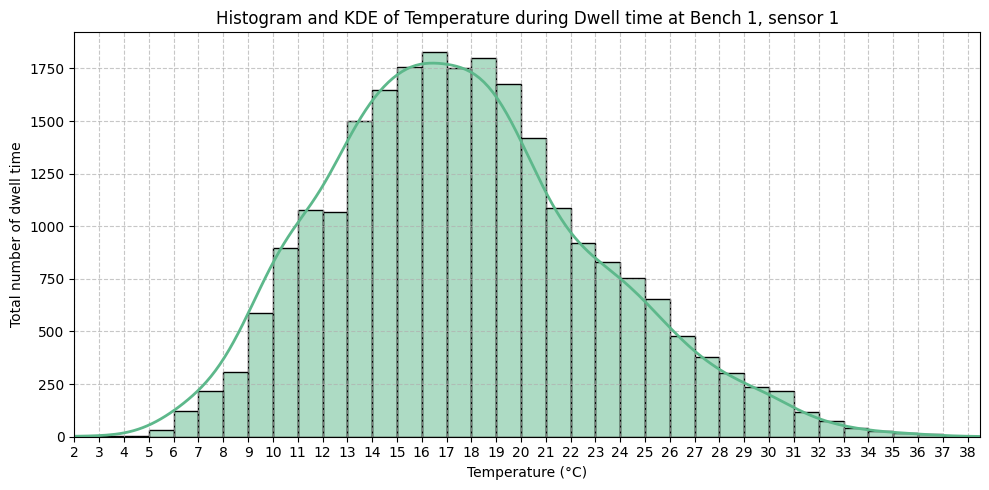

In [18]:
df_plot_s1 = df_s1.dropna(subset=["temp", "dwell"])

# Expand the x-axis a bit for a nicer plot
temp_extended = np.append(df_plot_s1["temp"], df_plot_s1["temp"].max() + 1)
dwell_extended = np.append(df_plot_s1["dwell"], 0)  # Add 0 to match the length

# Plot histogram and KDE
plt.figure(figsize=(10, 5))
sns.histplot(
    temp_extended,
    kde=True,
    bins=np.arange(df_s1["temp"].min(), df_s1["temp"].max() + 2, 1), 
    color=(93/255, 184/255, 139/255),
    alpha=0.5,
    #stat="density",
    stat="count",
    kde_kws={'bw_adjust': 1.5, 'cut': 0},    
    line_kws={'color': 'red', 'linewidth': 2}
)

#plt.title("Histogram og KDE af Temperatur ved Ophold på Bænk 1 sensor 1")
plt.title("Histogram and KDE of Temperature during Dwell time at Bench 1, sensor 1")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total number of dwell time")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(df_s1["temp"].min(), df_s1["temp"].max() + 1)

# x-axis correspond to whole degrees of temperature
plt.xticks(np.arange(int(df_s1["temp"].min()), int(df_s1["temp"].max()) + 2, 1))

plt.tight_layout()

# Save plot as image
plt.savefig("bench_sensor1_histogram.png", dpi=300, bbox_inches="tight")

plt.show()

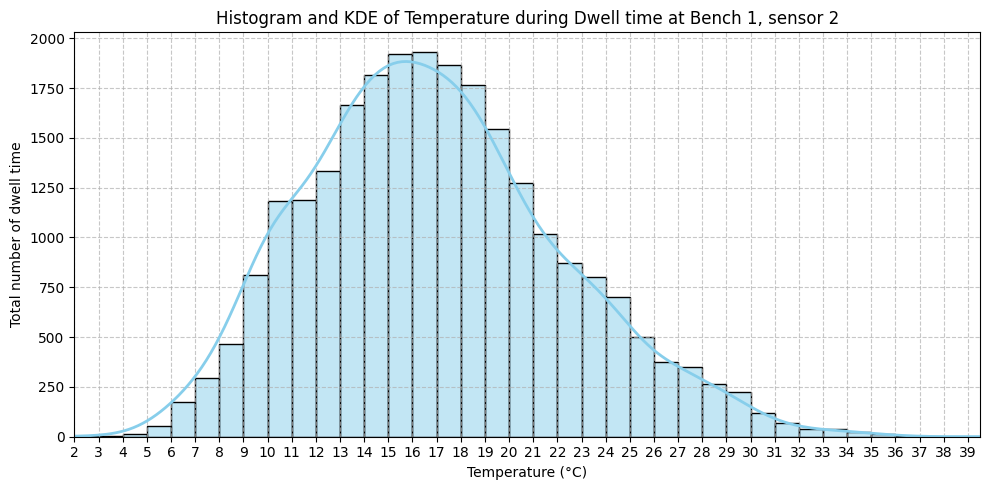

In [19]:
df_plot_s2 = df_s2.dropna(subset=["temp", "dwell"])

# Expand the x-axis a bit for a nicer plot
temp_extended = np.append(df_plot_s2["temp"], df_plot_s2["temp"].max() + 1)
dwell_extended = np.append(df_plot_s2["dwell"], 0)  # Add 0 to match the length

# Plot histogram and KDE
plt.figure(figsize=(10, 5))
sns.histplot(
    temp_extended,
    kde=True,
    bins=np.arange(df_s2["temp"].min(), df_s2["temp"].max() + 2, 1), 
    color="skyblue",
    alpha=0.5,
    #stat="density",
    stat="count",
    kde_kws={'bw_adjust': 1.5, 'cut': 0},   
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title("Histogram and KDE of Temperature during Dwell time at Bench 1, sensor 2")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total number of dwell time")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(df_s2["temp"].min(), df_s2["temp"].max() + 1)

# x-axis correspond to whole degrees of temperature
plt.xticks(np.arange(int(df_s2["temp"].min()), int(df_s2["temp"].max()) + 2, 1))


plt.tight_layout()
plt.show()

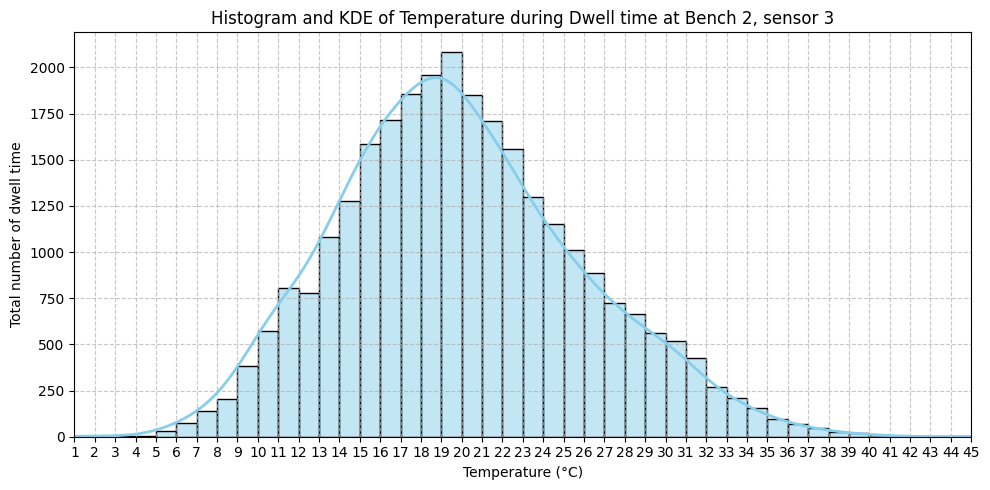

In [20]:
df_plot_s3 = df_s3.dropna(subset=["temp", "dwell"])

# Expand the x-axis a bit for a nicer plot
temp_extended = np.append(df_plot_s3["temp"], df_plot_s3["temp"].max() + 1)
dwell_extended = np.append(df_plot_s3["dwell"], 0)  # Add 0 to match the length

# Plot histogram and KDE
plt.figure(figsize=(10, 5))
sns.histplot(
    temp_extended,
    kde=True,
    bins=np.arange(df_s3["temp"].min(), df_s3["temp"].max() + 2, 1),  
    color="skyblue",
    alpha=0.5,
    #stat="density",
    stat="count",
    kde_kws={'bw_adjust': 1.5, 'cut': 0},     
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title("Histogram and KDE of Temperature during Dwell time at Bench 2, sensor 3")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total number of dwell time")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(df_s3["temp"].min(), df_s3["temp"].max() + 1)

# x-axis correspond to whole degrees of temperature
plt.xticks(np.arange(int(df_s3["temp"].min()), int(df_s3["temp"].max()) + 2, 1))


plt.tight_layout()
plt.show()

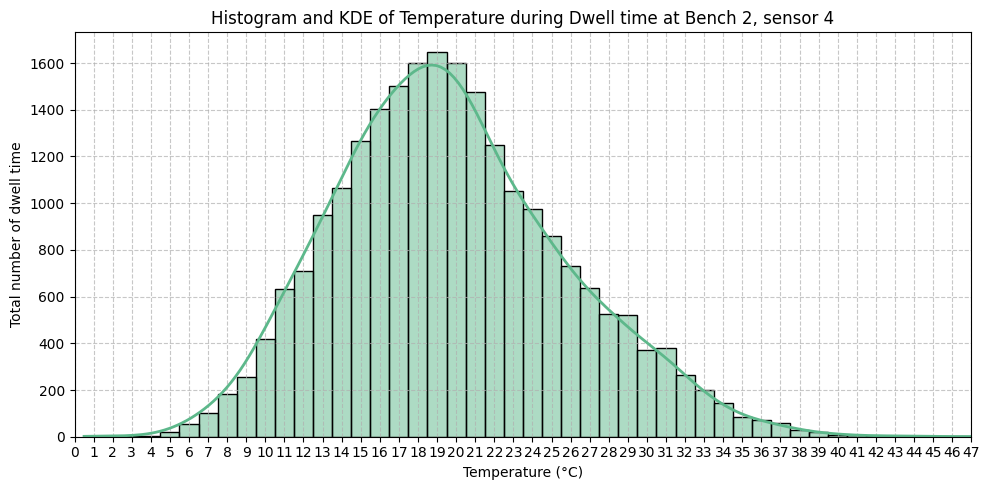

In [25]:
df_plot_s4 = df_s4.dropna(subset=["temp", "dwell"])

# Expand the x-axis a bit for a nicer plot
temp_extended = np.append(df_plot_s4["temp"], df_plot_s4["temp"].max() + 1)
dwell_extended = np.append(df_plot_s4["dwell"], 0)  # Add 0 to match the length

# Plot histogram and KDE
plt.figure(figsize=(10, 5))
sns.histplot(
    temp_extended,
    kde=True,
    bins=np.arange(df_s4["temp"].min(), df_s4["temp"].max() + 2, 1), 
    color=(93/255, 184/255, 139/255),
    alpha=0.5,
    #stat="density",
    stat="count",
    kde_kws={'bw_adjust': 1.5, 'cut': 0},    
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title("Histogram and KDE of Temperature during Dwell time at Bench 2, sensor 4")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total number of dwell time")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(df_s4["temp"].min(), df_s4["temp"].max() + 1)

# x-axis correspond to whole degrees of temperature
plt.xticks(np.arange(int(df_s4["temp"].min()), int(df_s4["temp"].max()) + 2, 1))

plt.tight_layout()

# Save plot as image
plt.savefig("bench_sensor4_histogram.png", dpi=300, bbox_inches="tight")

plt.show()

### Always last: Save data

In [22]:
benches_df = df
bench_df_s1 = df_s1
bench_df_s2 = df_s2
bench_df_s3 = df_s3
bench_df_s4 = df_s4

In [23]:
benches_df.to_csv("benches_df.csv", index=False)
bench_df_s1.to_csv("bench_df_s1.csv", index=False)
bench_df_s2.to_csv("bench_df_s2.csv", index=False)
bench_df_s3.to_csv("bench_df_s3.csv", index=False)
bench_df_s4.to_csv("bench_df_s4.csv", index=False)

In [24]:
bench_df_s1.head()

,dwell,temp,date,time,hour
0,3.150000,6.0,2020-06-05,09:19:06,9
1,3.150000,8.0,2020-06-05,10:11:11,10
2,7.216667,14.0,2020-06-05,12:46:34,12
3,3.116667,14.5,2020-06-05,13:04:14,13
4,2.966667,15.0,2020-06-05,13:24:58,13
